In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

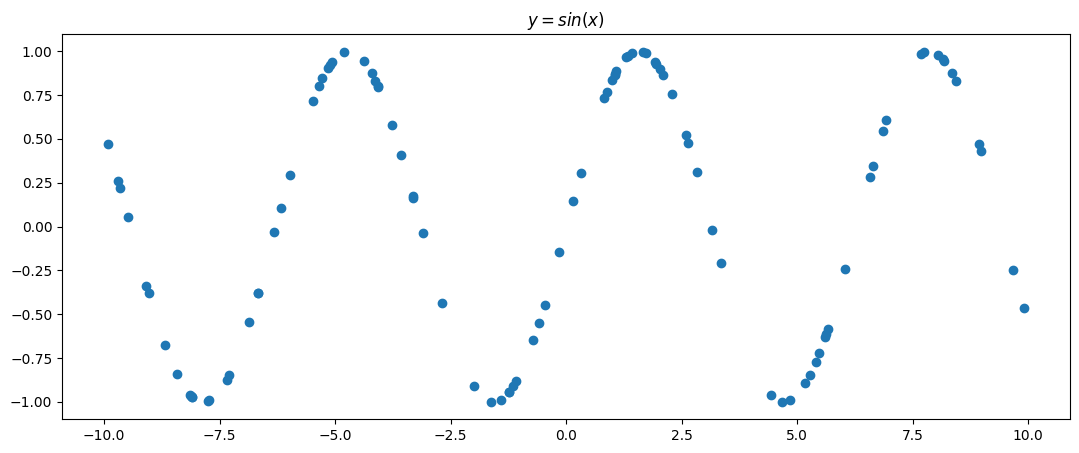

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

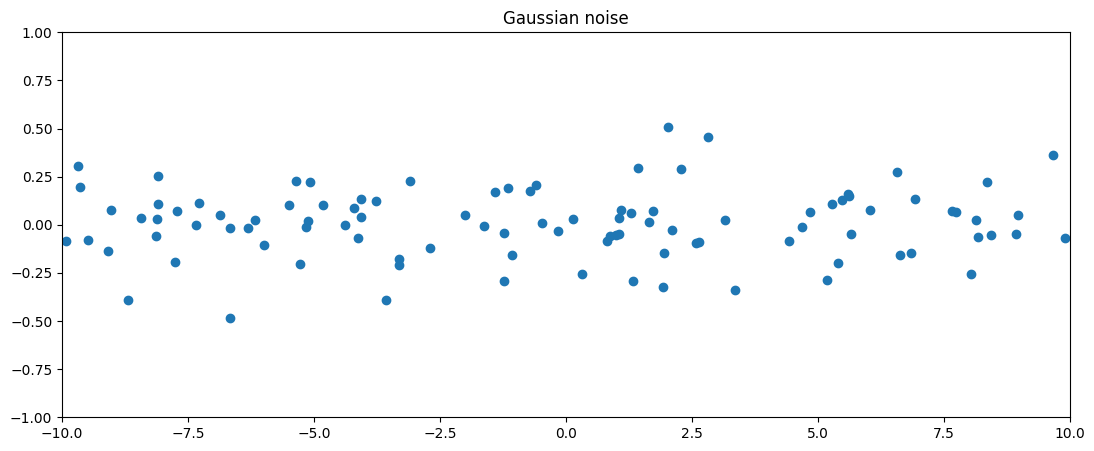

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

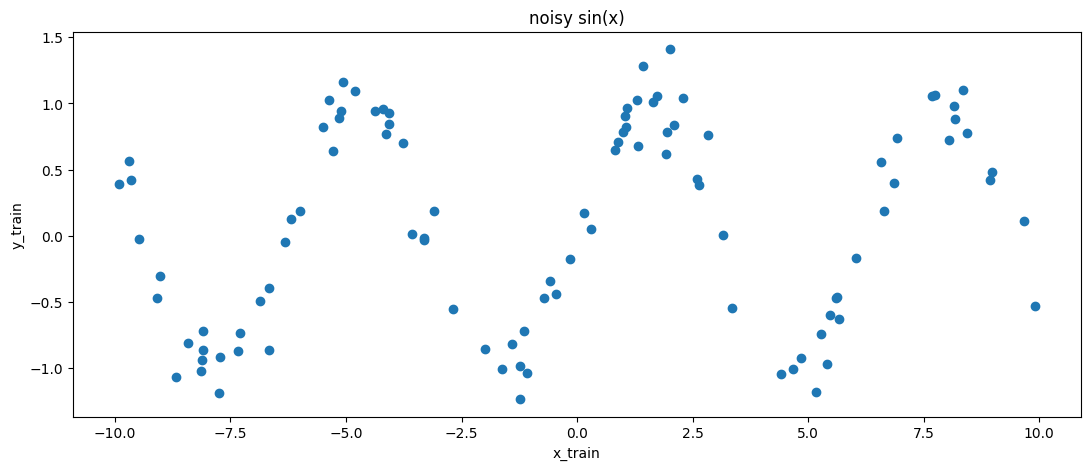

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [ ]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

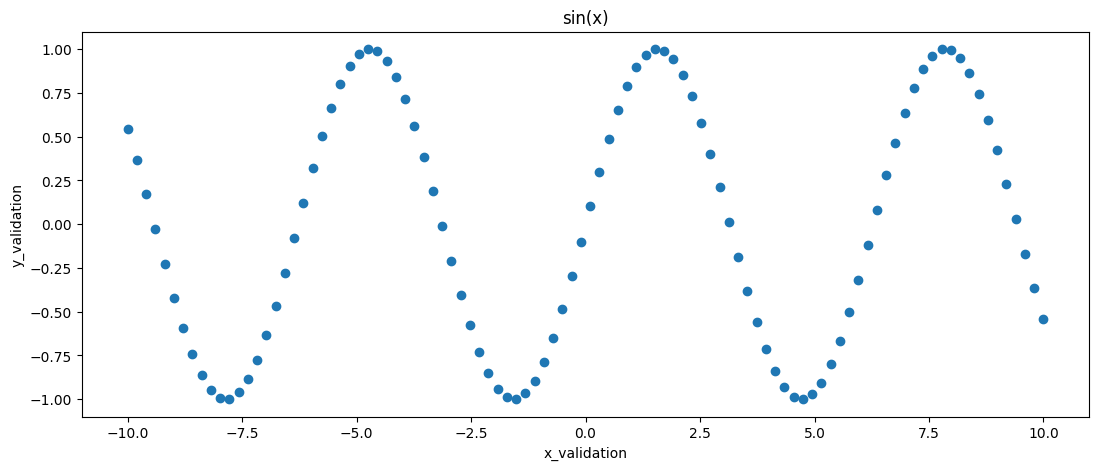

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()

        # 1st hidden layer - first fully-connection
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # Hidden Activasion function
        self.act1 = torch.nn.Sigmoid()
        # 2nd hidden layer - second fully-connection
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

# Prediction

In [6]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

In [ ]:
predict(sine_net, x_validation, y_validation)

# Optimizer

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [ ]:
def loss(pred, target):
    # MSE (Mean Square Error) = (predicted output - target) ** 2
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

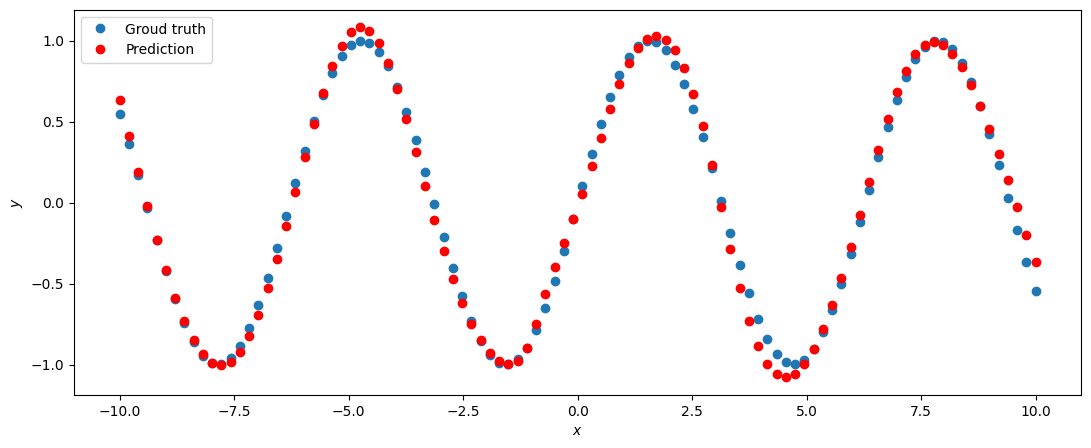

In [ ]:
# Epoch for all data, batch for parts
for epoch_index in range(2000):
    optimizer.zero_grad()

    # Prediction
    y_pred = sine_net.forward(x_train)

    # Count
    loss_val = loss(y_pred, y_train)

    # Backward
    loss_val.backward()

    # Optimization
    optimizer.step()

predict(sine_net, x_validation, y_validation)

# Home  Work Part 1

We train a neural network for a regression problem:

Let's take a more complex function as a target: $$y=2^xsin(2^{-x})$$

In addition, we want to get a good MAE metric for validation: $$MAE=1/l\sum_{i=1}^{l}|y\_pred_i - y\_target_i|$$

whereas the familiar MSE looks like $$MSE=1/l\sum_{i=1}^{l}(y\_pred_i - y\_target_i)^2$$

What can be varied:

1) Network architecture

2) loss function

3) lr optimizer

4) Number of epochs in training

In [43]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(50)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    # MAE (Mean Absolute Error) = | predicted output - target |
    return (pred - target).abs().mean()

for epoch_index in range(3000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# The check is carried out by calling the code:
def metric(pred, target):
    return (pred - target).abs().mean()

metric(y_pred, y_train)

tensor(0.0426, grad_fn=<MeanBackward0>)

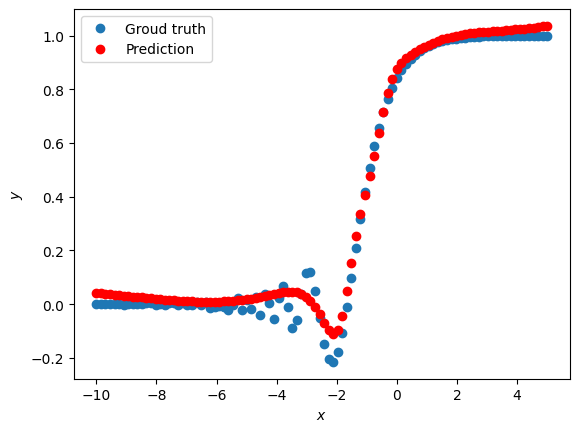

In [44]:
import matplotlib.pyplot as plt

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)